In [2]:
import pandas as pd

uv_df = pd.read_csv("C:/Users/user/Desktop/ai-proj2/중간본/자외선_일별최고치_데이터셋.csv", encoding="UTF-8")

uv_df.head()

,datetime,region,no2,co,so2,o3,pm10,pm25,temperature,wind_direction,wind_speed,precipitation,humidity,uv_max
0,2015-01-01 00:00:00,서울시,0.026,0.8,0.008,0.032,168,42,-3.8,358.9,8.3,0.0,71.0,4.7
1,2015-01-02 00:00:00,서울시,0.048,1.0,0.009,0.034,57,27,-0.9,359.6,7.0,0.0,82.0,4.7
2,2015-01-03 00:00:00,서울시,0.079,1.6,0.012,0.020,76,50,3.0,359.8,3.7,0.0,91.0,4.7
3,2015-01-04 00:00:00,서울시,0.104,2.7,0.011,0.027,97,53,8.2,359.3,4.2,0.0,100.0,4.7
4,2015-01-05 00:00:00,서울시,0.106,2.6,0.018,0.028,133,77,9.9,359.3,5.0,0.0,100.0,4.7


In [3]:
df1 = uv_df[['datetime', 'region', 'uv_max']]

df1.head()

,datetime,region,uv_max
0,2015-01-01 00:00:00,서울시,4.7
1,2015-01-02 00:00:00,서울시,4.7
2,2015-01-03 00:00:00,서울시,4.7
3,2015-01-04 00:00:00,서울시,4.7
4,2015-01-05 00:00:00,서울시,4.7


In [4]:
df1['region'].unique()

array(['서울시'], dtype=object)

In [5]:
seoul_uv = df1[df1['region']=='서울시']
seoul_uv.head()

,datetime,region,uv_max
0,2015-01-01 00:00:00,서울시,4.7
1,2015-01-02 00:00:00,서울시,4.7
2,2015-01-03 00:00:00,서울시,4.7
3,2015-01-04 00:00:00,서울시,4.7
4,2015-01-05 00:00:00,서울시,4.7


In [6]:
seoul_uv['datetime'] = pd.to_datetime(seoul_uv['datetime'])

In [7]:
seoul_uv

,datetime,region,uv_max
0,2015-01-01,서울시,4.7
1,2015-01-02,서울시,4.7
2,2015-01-03,서울시,4.7
3,2015-01-04,서울시,4.7
4,2015-01-05,서울시,4.7
...,...,...,...
3588,2024-12-27,서울시,3.3
3589,2024-12-28,서울시,3.5
3590,2024-12-29,서울시,3.5
3591,2024-12-30,서울시,3.0


In [8]:

seoul_uv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3593 non-null   datetime64[ns]
 1   region    3593 non-null   object        
 2   uv_max    3593 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.3+ KB


In [ ]:
numeric_cols = seoul_uv.select_dtypes(include='number').columns.tolist()

# datetime 기준으로 숫자형 컬럼 평균값 집계
df_grouped = seoul_uv.groupby('datetime')[numeric_cols].mean().reset_index()

# datetime 기준으로 오름차순 정렬
df_grouped.sort_values(by='datetime', inplace=True)

In [10]:
seoul_uv = df_grouped

seoul_uv.head()

,datetime,uv_max
0,2015-01-01,4.7
1,2015-01-02,4.7
2,2015-01-03,4.7
3,2015-01-04,4.7
4,2015-01-05,4.7


In [11]:
seoul_uv.set_index('datetime', inplace=True)


In [12]:
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(seoul_uv['uv_max'], model='additive', period=365)

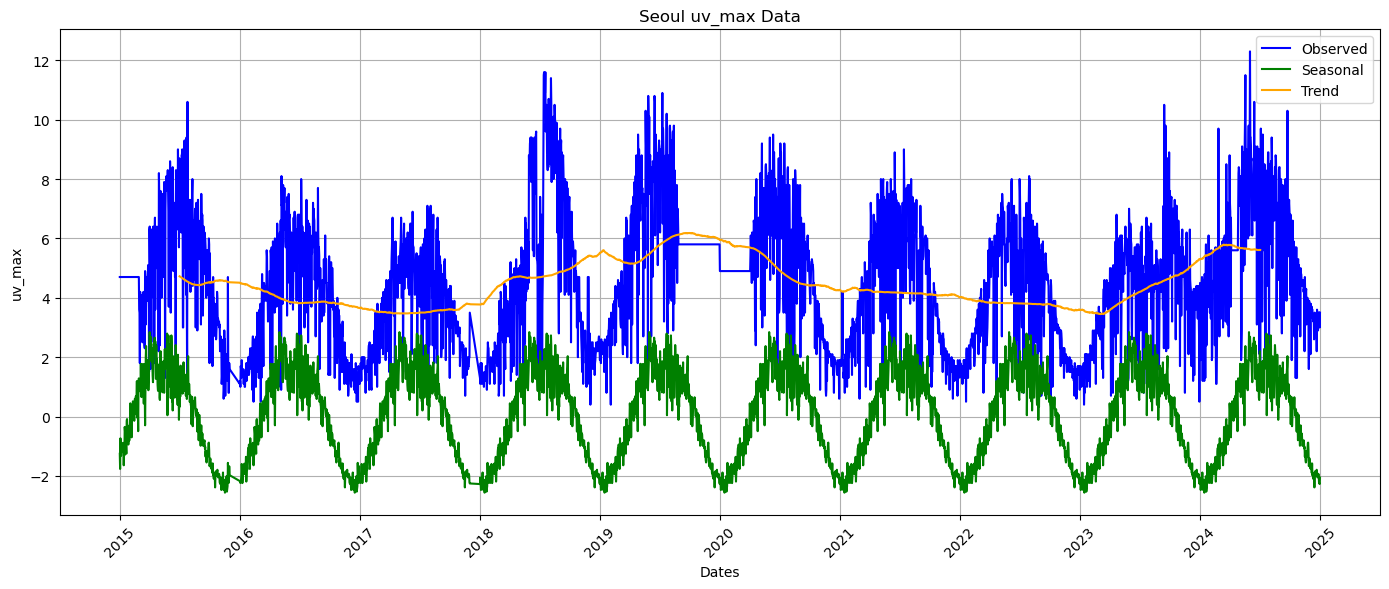

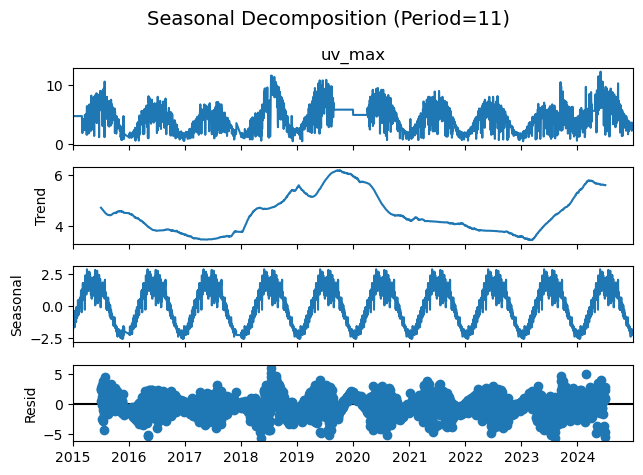

In [13]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# 그림과 축 생성
fig, ax = plt.subplots(figsize=(14, 6))

# 선형 그래프
# ax.plot(df.index, df['SUNACTIVITY'], color='black', label='original')
# ax.plot(df.index, df['MA_11'], color='red', label='11-year MA')
ax.plot(seoul_uv.index, result.observed, color='blue', label='Observed')
ax.plot(seoul_uv.index, result.seasonal, color='green', label='Seasonal')
ax.plot(seoul_uv.index, result.trend, color='orange', label='Trend')

# 눈금 설정: 20년 간격, 연도 형식
ax.xaxis.set_major_locator(YearLocator(1))  # 20년 단위 눈금
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # YYYY 형식

# 레이블, 제목
ax.set_xlabel('Dates')
ax.set_ylabel('uv_max')
ax.set_title('Seoul uv_max Data')

# 눈금 회전
plt.xticks(rotation=45)

# 범례, 그리드, 레이아웃
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# seasonal decomposition 결과 시각화
result.plot()
plt.suptitle("Seasonal Decomposition (Period=11)", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(seoul_uv['uv_max'], model='multiplicative', period=365)

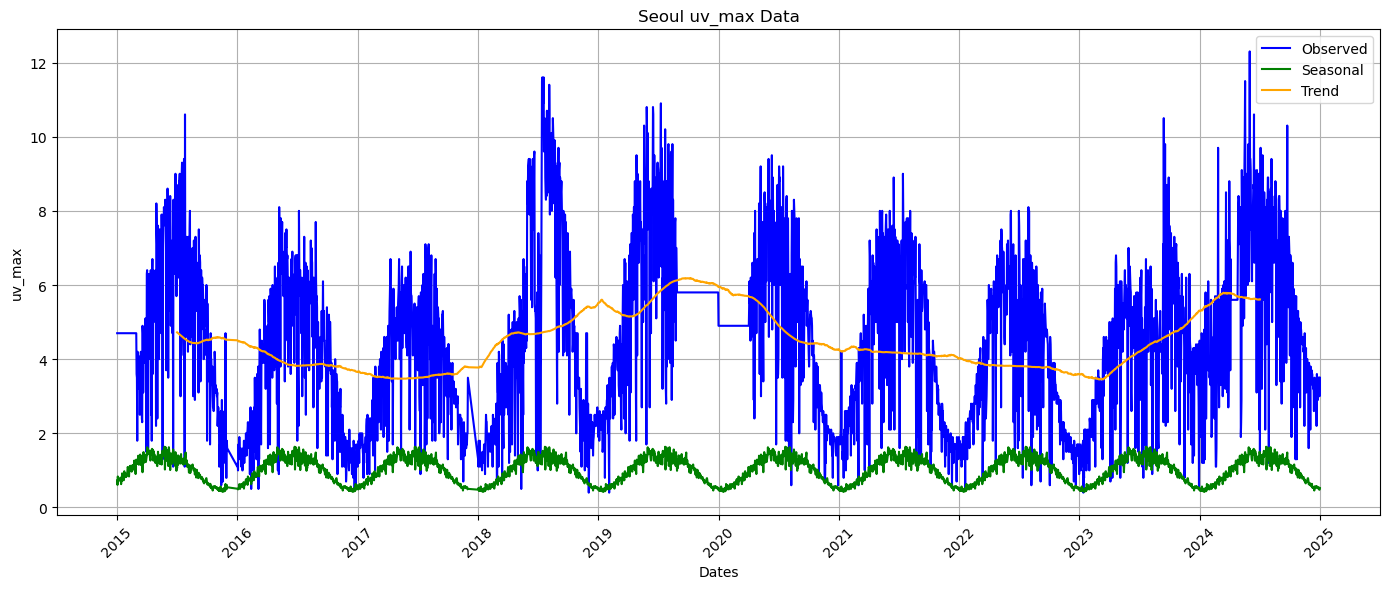

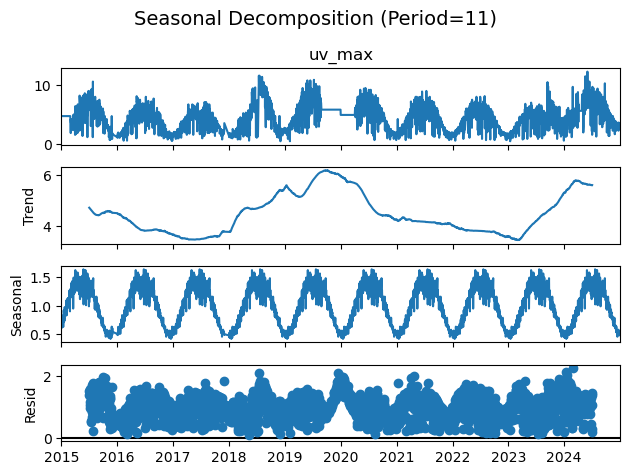

In [15]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# 그림과 축 생성
fig, ax = plt.subplots(figsize=(14, 6))

# 선형 그래프
# ax.plot(df.index, df['SUNACTIVITY'], color='black', label='original')
# ax.plot(df.index, df['MA_11'], color='red', label='11-year MA')
ax.plot(seoul_uv.index, result.observed, color='blue', label='Observed')
ax.plot(seoul_uv.index, result.seasonal, color='green', label='Seasonal')
ax.plot(seoul_uv.index, result.trend, color='orange', label='Trend')

# 눈금 설정: 20년 간격, 연도 형식
ax.xaxis.set_major_locator(YearLocator(1))  # 20년 단위 눈금
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # YYYY 형식

# 레이블, 제목
ax.set_xlabel('Dates')
ax.set_ylabel('uv_max')
ax.set_title('Seoul uv_max Data')

# 눈금 회전
plt.xticks(rotation=45)

# 범례, 그리드, 레이아웃
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# seasonal decomposition 결과 시각화
result.plot()
plt.suptitle("Seasonal Decomposition (Period=11)", fontsize=14)
plt.tight_layout()
plt.show()

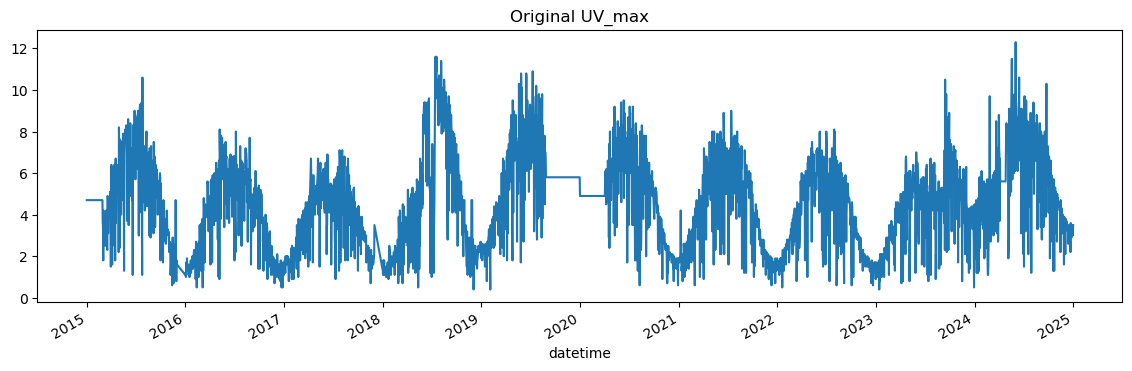

ADF Statistic: -3.7218294733173427
p-value: 0.0038163725856689393


In [16]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 시계열 시각화
plt.figure(figsize=(14, 4))
seoul_uv['uv_max'].plot(title='Original UV_max')
plt.show()

# ADF (Augmented Dickey-Fuller) 검정
adf_result = adfuller(seoul_uv['uv_max'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

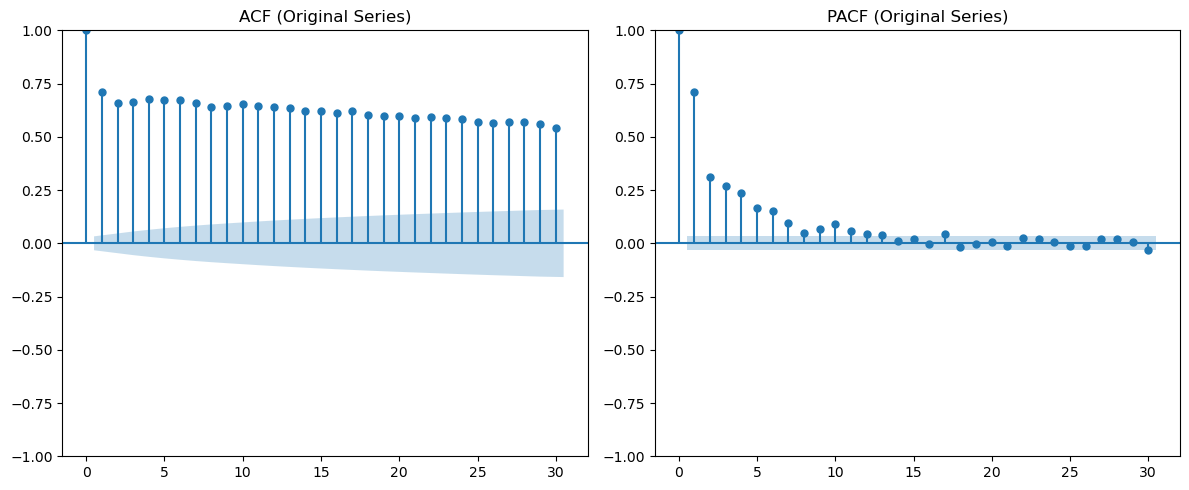

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(seoul_uv['uv_max'], lags=30, ax=plt.gca())
plt.title("ACF (Original Series)")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(seoul_uv['uv_max'], lags=30, ax=plt.gca(), method='ywm')
plt.title("PACF (Original Series)")

plt.tight_layout()
plt.show()

In [18]:
#p=3 : PACF에서 유의미하게 튄 구간
#d=0 : 이미 정상성이 확보되었으므로 차분 불필요
#q=0 : ACF에서 절단이 명확하지 않음 → MA 필요성 낮음